In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import h5py
positions = np.load('rblocs.npy')
flowData = h5py.File('snapshots/snapshots_s1.h5','r')
b = flowData['tasks/b']
x = flowData['scales/x/1.0']
y = flowData['scales/z/1.0']

(0.0, 1.0)

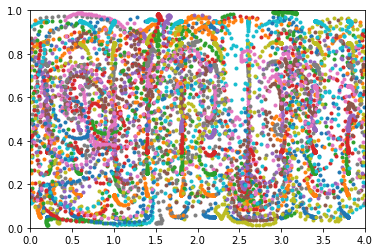

In [2]:
fig = plt.figure()
for i in range(positions.shape[0]):
    plt.plot(positions[i,:,0],positions[i,:,1],'.')
    
plt.xlim([0,4])
plt.ylim([0,1])

(100, 256, 64)


(0.0, 0.9998494093481021)

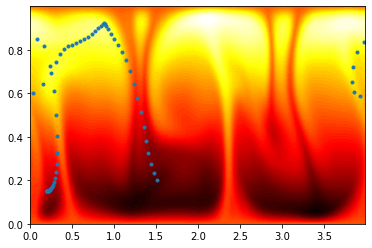

In [3]:
# Plot particle N
N = 1
fig = plt.figure()
plt.plot(positions[N,:,0],positions[N,:,1],'.')
print(b.shape)
plt.contourf(x,y,b[-1,:,:].T,100,cmap='hot')
plt.xlim([0,x[-1]])
plt.ylim([0,y[-1]])

<ipython-input-4-de7bb351e625>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cont = ax.pcolormesh(x,y,b[-1,:,:].T/np.max(np.abs(b[-1,:,:])),cmap='hot')


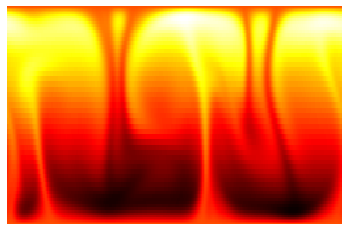

In [4]:
fig, ax = plt.subplots()
plt.axis('off')
xdata, ydata = [], []
ln, = ax.plot([], [], 'ob',markersize=5)
cont = ax.pcolormesh(x,y,b[-1,:,:].T/np.max(np.abs(b[-1,:,:])),cmap='hot')
def init():
    ax.set_xlim(0, x[-1])
    ax.set_ylim(0, y[-1])
#     ax.set_aspect('equal')
    return ln,

def update(i):
    ln.set_data(positions[:,i,0], positions[:,i,1])
    cont.set_array(b[i,:,:].T/np.max(np.abs(b[i,:,:])))
    return ln,

ani = FuncAnimation(fig, update, frames=positions.shape[1]-1,
                    init_func=init, blit=True)